# Support Vector Machine (SVM)

**Support Vector Machine (SVM)** is a powerful supervised machine learning algorithm primarily used for classification tasks, though it can also be applied to regression. SVM works by finding the best boundary (also called a hyperplane) that separates data points from different classes.

### Key Concepts:
#### Hyperplane:

In 2D, this is just a line that divides the space into two parts. In higher dimensions, it's a hyperplane, but the idea is the same. The hyperplane aims to separate the different classes of data.
Support Vectors:

These are the data points that are closest to the hyperplane. The SVM focuses on these points because they are the most difficult to classify. The support vectors play a key role in defining the optimal hyperplane.
Maximizing the Margin:

SVM tries to find a hyperplane that not only separates the classes but also maximizes the margin between the hyperplane and the closest data points (support vectors). The larger the margin, the better the model generalizes to unseen data.

#### Linear vs. Non-linear:

Linear SVM works when the data is linearly separable (i.e., you can draw a straight line or hyperplane to separate the classes).
Non-linear SVM uses a kernel trick to transform the input space into higher dimensions, allowing the algorithm to find a non-linear decision boundary. Common kernels include Radial Basis Function (RBF), polynomial kernel, and sigmoid kernel.

#### Cost/Regularization Parameter (C):

This controls the trade-off between maximizing the margin and minimizing classification errors. A high value of C means a smaller margin but fewer classification errors, while a low value allows for a larger margin but with more errors.

#### Kernel Trick:

When the data isn't linearly separable, the kernel trick is used to map the data into a higher-dimensional space where a hyperplane can separate the classes. Common kernels include linear, polynomial, RBF (Radial Basis Function), and sigmoid.
#### How SVM Works:
#####  Training Phase:
The algorithm starts by identifying the support vectors and then tries to find the hyperplane that maximizes the margin.

##### Prediction Phase:
Once the model is trained, for new data points, SVM will classify them based on which side of the hyperplane they fall.
* **Pros of SVM:**
It works well for both linearly separable and non-linearly separable data.
Effective in high-dimensional spaces.
It’s less prone to overfitting, especially in high-dimensional space.
* **Cons of SVM:**
SVMs can be computationally expensive and memory intensive, especially with large datasets.
Choosing the right kernel and tuning parameters can be tricky.

## Note: 

The hardness of the margin is controlled by a turning parameter, denoted by C.
Using low values of C will cause the algorithms to try to adjust to the majority of datapoints, while using a higher value of C stresses the importance of each individual data point. in other words,
* Under low regularization (i.e for large C), the margin are tight and points cannot lie in it and therefore few support vectors.
* Under high regularization (i.e, for smaller C), the margin are softer and therefore more support vectors, which influence the solution.


# Linear SVM code example

In [14]:
!pip install mglearn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [15]:
import sys
!{sys.executable} -m pip install mglearn

     |████████████████████████████████| 581 kB 1.6 MB/s eta 0:00:01


In [16]:
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets.samples_generator import make_blobs

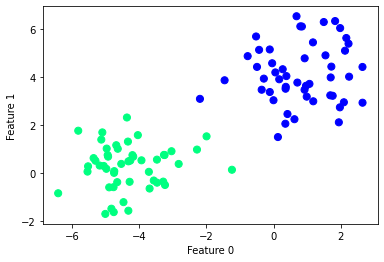

In [4]:
X,y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=3, cluster_std=1.1)
plt.scatter(X[:,0],X[:,1] , c=y, s=50,cmap='winter')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

In [20]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
svm_model_linear = SVC(kernel='linear')

In [21]:
svm_model_linear.fit(X_train, y_train)
pred = svm_model_linear.predict(X_test)
print(svm_model_linear.score(X_test, y_test))

1.0


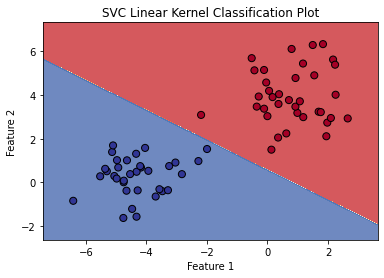

In [22]:
# Visualize the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the labels for the grid points
Z = svm_model_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.RdYlBu)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, marker='o', s=50, edgecolors='k')
plt.title("SVC Linear Kernel Classification Plot")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Kernelized SVM


Kernelized Support Vector Machine (SVM) is an extension of the standard SVM that allows the model to **work with non-linearly separable data** by transforming the data into a higher-dimensional space where a linear hyperplane can be used to separate the classes.

### Why Kernelized SVM?
In many real-world problems, the data may not be linearly separable in its original space. To address this, kernels are used to implicitly map the data into a higher-dimensional space without actually calculating the transformation (this is done through the kernel trick). In this transformed space, a linear decision boundary may exist.

#### Kernel Trick:
Instead of explicitly transforming data into higher dimensions, the kernel trick uses a kernel function to compute the dot product of the data points in the higher-dimensional space, avoiding the need for expensive transformations.

![alt-text](images/kernel-type1.png)
![alt-text](images/kernel-type2.png)

# Example RBF Kernel in python

Accuracy with RBF Kernel: 100.00%


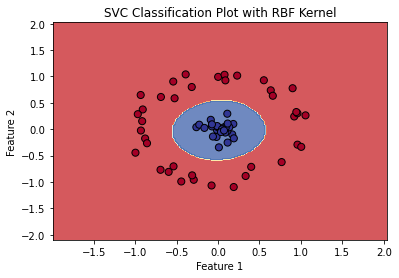

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_circles
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
X,y = make_circles(100, factor=.1, noise=.1)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM classifier with an RBF kernel
svm_model_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the SVM model
svm_model_rbf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = svm_model_rbf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with RBF Kernel: {accuracy * 100:.2f}%")

# Visualize the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the labels for the grid points
Z = svm_model_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.RdYlBu)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, marker='o', s=50, edgecolors='k')
plt.title("SVC Classification Plot with RBF Kernel")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
